In [0]:
import cv2
import numpy as np
from google.colab import drive
import os
from google.colab.patches import cv2_imshow
criteria = (3, 30, 0.001)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
squaresize = 84
objp = np.zeros((48,3), np.float32)
objp[:,:2] = (np.mgrid[0:8,0:6].T.reshape(-1,2))*squaresize
imgpoints_l = []
imgpoints_r = []
objpoints = [] 
path_l = "/content/drive/My Drive/CV_Lab_6_images/cam1"
path_r = "/content/drive/My Drive/CV_Lab_6_images/cam2"
files = os.listdir(path_l);
for fname in files:
  img_l = cv2.imread(path_l + '/'+fname)
  '''scale_percent = 15 # percent of original size
  width = int(img_l.shape[1] * scale_percent / 100)
  height = int(img_l.shape[0] * scale_percent / 100)
  dim = (width, height)
  gray = cv2.resize(img_l,dim)'''
  gray_l = cv2.cvtColor(img_l,cv2.COLOR_BGR2GRAY)

  img_r = cv2.imread(path_r +'/'+ fname)
  '''scale_percent = 15 # percent of original size
  width = int(img_r.shape[1] * scale_percent / 100)
  height = int(img_r.shape[0] * scale_percent / 100)
  dim = (width, height)
  gray = cv2.resize(img_r,dim)'''
  gray_r = cv2.cvtColor(img_r,cv2.COLOR_BGR2GRAY)
  
  scale_factor = 500.0/gray_l.shape[1]
  height = int(gray_l.shape[1]*scale_factor)
  width = int(gray_l.shape[0]*scale_factor)
  gray_l = cv2.resize(gray_l,(height,width))

  ret_l, corners_l = cv2.findChessboardCorners(gray_l, (8,6),None)
  ret_r, corners_r = cv2.findChessboardCorners(gray_r, (8,6),None)

  if ret_l == True and ret_r == True:
    print(fname);
    objpoints.append(objp)

    corners2_l = cv2.cornerSubPix(gray_l,corners_l,(11,11),(-1,-1),criteria)
    imgpoints_l.append(corners2_l)
    
          # Draw and display the corners
    img_l = cv2.drawChessboardCorners(gray_l, (8,6), corners_l,ret_l)
    #cv2_imshow(img_l)

    corners2_r = cv2.cornerSubPix(gray_r,corners_r,(11,11),(-1,-1),criteria)
    imgpoints_r.append(corners2_r)
    
      # Draw and display the corners
    img_r = cv2.drawChessboardCorners(gray_r, (8,6), corners_r,ret_r)
    #cv2_imshow(img_r)

IMG_0004.JPG
IMG_0012.JPG
IMG_0011.JPG
IMG_0009.JPG
IMG_0003.JPG
IMG_0006.JPG
IMG_0002.JPG
IMG_0013.JPG
IMG_0017.JPG
IMG_0005.JPG
IMG_0007.JPG
IMG_0008.JPG
IMG_0010.JPG


In [0]:
retl, mtxl, distl, rvecsl, tvecsl = cv2.calibrateCamera(objpoints, imgpoints_l, gray_l.shape[::-1],None,None)
retr, mtxr, distr, rvecsr, tvecsr = cv2.calibrateCamera(objpoints, imgpoints_r, gray_r.shape[::-1],None,None)

In [0]:
ret,mtx1,dist1,mtx2,dist2,R,T,E,F = cv2.stereoCalibrate(objpoints,imgpoints_l,imgpoints_r,mtxl,distl,mtxr,distr,gray_l.shape[::-1])

In [0]:
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(mtxl, distl, mtxr, distr, gray_l.shape[::-1], R, T);

In [0]:
'''map_l1,map_l2 = cv2.initUndistortRectifyMap(mtxl, distl, R1, P1, gray_l.shape[::-1], cv2.CV_16SC2)
map_r1,map_r2 = cv2.initUndistortRectifyMap(mtxr, distr, R2, P2, gray_r.shape[::-1], cv2.CV_16SC2)

img_l = cv2.imread("left12.JPG") #bgtake2left.tif")
img_r = cv2.imread("right12.JPG") #bgtake2right.tif")


op_l = cv2.remap(img_l, map_l1, map_l2, cv2.INTER_LANCZOS4)
op_r = cv2.remap(img_r, map_r1, map_r2, cv2.INTER_LANCZOS4)

scale_factor = 1000.0/op_l.shape[1]
height = int(op_l.shape[1]*scale_factor)
width = int(op_l.shape[0]*scale_factor)
op_l = cv2.resize(op_l,(height,width))
op_r = cv2.resize(op_r,(height,width))


for line in range(1,20):
    op_l[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
    op_r[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
#cv2_imshow(np.hstack([op_l, op_r]))'''

In [0]:
img_l = cv2.imread("left.JPG") #bgtake2left.tif")
img_r = cv2.imread("right.JPG") #bgtake2right.tif")

In [0]:
gray_l = cv2.cvtColor(img_l,cv2.COLOR_BGR2GRAY)
gray_r = cv2.cvtColor(img_r,cv2.COLOR_BGR2GRAY)

'''# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(gray_l,None)
kp2, des2 = orb.detectAndCompute(gray_r,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)'''

ret_l, corners_l = cv2.findChessboardCorners(gray_l, (8,6),None)
ret_r, corners_r = cv2.findChessboardCorners(gray_r, (8,6),None)

if ret_l == True and ret_r == True:
  corners2_l = cv2.cornerSubPix(gray_l,corners_l,(11,11),(-1,-1),criteria)
  corners2_r = cv2.cornerSubPix(gray_r,corners_r,(11,11),(-1,-1),criteria)
  F_mat,mask = cv2.findFundamentalMat(corners2_l,corners2_r)

In [0]:
matches[0]

<DMatch 0x7f226645e270>

In [0]:
ret,H1,H2 = cv2.stereoRectifyUncalibrated(corners2_l, corners2_r, F_mat, gray_l.shape[::-1])

In [0]:
op_l = cv2.warpPerspective(img_l,H1,gray_l.shape[::-1])
op_r = cv2.warpPerspective(img_r,H2,gray_l.shape[::-1])
scale_factor = 500.0/op_l.shape[1]
print(scale_factor)
height = int(op_l.shape[1]*scale_factor)
width = int(op_l.shape[0]*scale_factor)
op_l = cv2.resize(op_l,(height,width))
op_r = cv2.resize(op_r,(height,width))

0.09645061728395062


In [0]:
op_l.shape, op_r.shape

((333, 500, 3), (333, 500, 3))

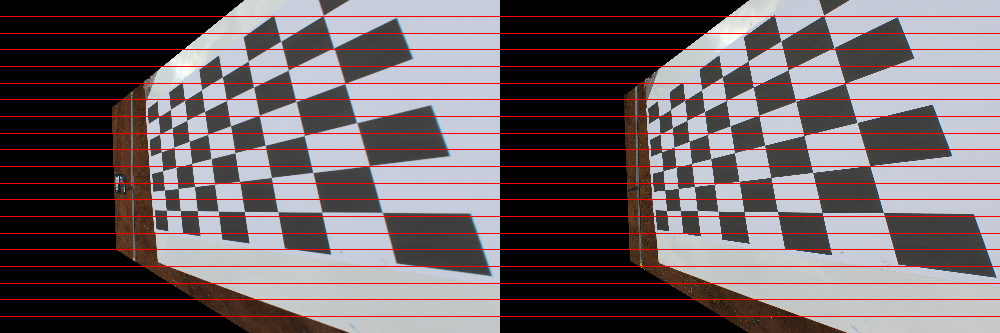

In [0]:
for line in range(1,20):
    op_l[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
    op_r[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
cv2_imshow(np.hstack([op_l, op_r]))

In [0]:
scale_factor = 500.0/img_l.shape[1]
height = int(img_l.shape[1]*scale_factor)
width = int(img_l.shape[0]*scale_factor)
img_l = cv2.resize(img_l,(height,width))
img_r = cv2.resize(img_r,(height,width))


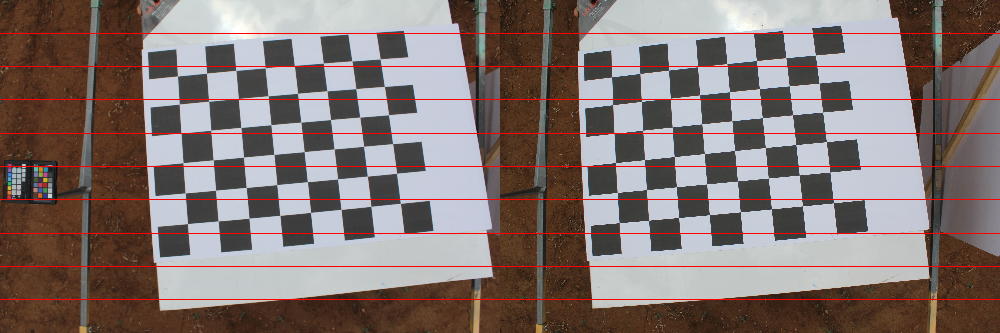

In [0]:
for line in range(1,10):
    img_l[int(line*img_l.shape[0]/10), :] = (0, 0, 255)
    img_r[int(line*img_r.shape[0]/10), :] = (0, 0, 255)
cv2_imshow(np.hstack([img_l, img_r]))

In [0]:
op_l.shape

(333, 500, 3)

In [0]:
gray_l.shape[::-1]

(5184, 3456)